In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()

In [2]:
df=pd.read_csv("german_credit_data.csv")

In [3]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [5]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
df.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [7]:
df.shape

(1000, 11)

In [8]:
df=df.dropna()

In [9]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
7,7,35,male,3,rent,little,moderate,6948,36,car,good
9,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
989,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
993,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [10]:
df['Sex']= label_encoder.fit_transform(df['Sex'])
df['Age']= label_encoder.fit_transform(df['Age'])
df['Job']= label_encoder.fit_transform(df['Job'])
df['Housing']= label_encoder.fit_transform(df['Housing'])
df['Saving accounts']= label_encoder.fit_transform(df['Saving accounts'])
df['Checking account']= label_encoder.fit_transform(df['Checking account'])
df['Credit amount']= label_encoder.fit_transform(df['Credit amount'])
df['Duration']= label_encoder.fit_transform(df['Duration'])
df['Purpose']= label_encoder.fit_transform(df['Purpose'])
df['Risk']= label_encoder.fit_transform(df['Risk'])

In [11]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,1,3,0,2,1,0,1,421,26,5,0
3,3,26,1,2,0,0,0,465,23,4,1
4,4,34,1,2,0,0,0,405,14,1,0
7,7,16,1,3,2,0,1,450,20,1,1
9,9,9,1,3,1,0,1,411,18,1,0
...,...,...,...,...,...,...,...,...,...,...,...
989,989,29,1,1,1,0,1,178,14,5,1
993,993,11,1,3,1,0,0,369,20,4,1
996,996,21,1,3,1,0,0,360,18,1,1
998,998,4,1,2,0,0,0,189,24,5,0


In [12]:
X=df[['Age','Sex','Job','Housing','Saving accounts','Checking account','Credit amount','Duration','Purpose']]
y=df['Risk']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [15]:
y_pred = knn.predict(X_test)

In [16]:
confusion_matrix(y_test, y_pred)

array([[26, 27],
       [28, 50]], dtype=int64)

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
accuracy_score(y_test, y_pred)

0.5801526717557252

In [19]:
from sklearn.metrics import precision_recall_fscore_support

In [20]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.48148148, 0.64935065]),
 array([0.49056604, 0.64102564]),
 array([0.48598131, 0.64516129]),
 array([53, 78], dtype=int64))

In [21]:
from sklearn.metrics import precision_score

In [22]:
precision_score(y_test, y_pred)

0.6493506493506493

In [23]:
from sklearn.metrics import recall_score

In [24]:
from sklearn.metrics import f1_score

In [25]:
f1_score(y_test, y_pred)

0.6451612903225807

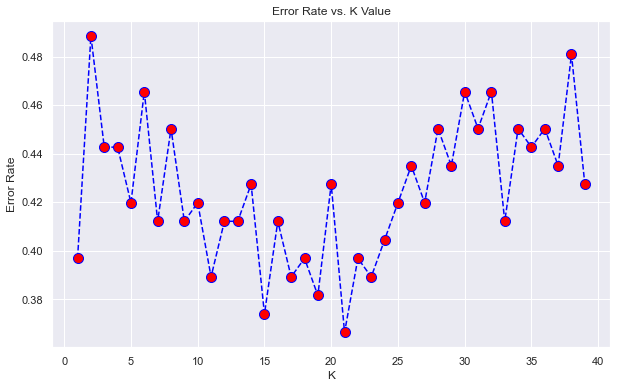

Minimum error:- 0.36641221374045807 at K = 21


In [26]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [27]:
knn = KNeighborsClassifier(n_neighbors=21, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=21)

In [28]:
y_pred = knn.predict(X_test)

In [29]:
accuracy_score(y_test, y_pred)

0.6335877862595419